In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
path=r"C:\Users\Emman\Desktop\JE\Ortho\OrthoCAD_Export_64406802\64406802_shell_occlusion_l.stl"
#path=r"C:\Users\Emman\Desktop\JE\Ortho\STL-Segmentation\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"

def segmentation(object=None,path=None):
    if object is None:
        object=o3d.io.read_triangle_mesh(path)
    pcd = object.sample_points_poisson_disk(800_000)

    # you can plot and check
    #o3d.visualization.draw_geometries([mesh])
    #o3d.visualization.draw_geometries([pointcloud])

    with o3d.utility.VerbosityContextManager(
            o3d.utility.VerbosityLevel.Debug) as cm:
        labels = np.array(
            pcd.cluster_dbscan(eps=2.7, min_points=2500, print_progress=True))

    max_label = labels.max()
    print(f"point cloud has {max_label + 1} clusters")
    colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
    colors[labels < 0] = 0
    pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
    count_label=0
    big_label=0

    for label in np.unique(labels):
        if label!=-1:
            count_label_=np.sum(labels==label)
            print(label,count_label_)
            if count_label_>count_label:
                count_label=count_label_
                big_label=label

    print("Final:",big_label,count_label)
    color_big_label=plt.get_cmap("tab20")(big_label / (max_label if max_label > 0 else 1))
    pcd_truncated = o3d.geometry.PointCloud()
    pcd_truncated.points=o3d.utility.Vector3dVector(np.asarray(pcd.points)[(np.asarray(pcd.colors)==color_big_label[:3]).any(axis=1)])
    return pcd_truncated
pcd_truncated=segmentation(path=path)


: 

In [2]:
o3d.visualization.draw_geometries([o3d.io.read_triangle_mesh(path)],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

In [3]:
o3d.visualization.draw_geometries([pcd_truncated],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [4]:
def to_binary(number):
    assert(number<8)
    if number>3:
        return np.array(list(np.binary_repr(number)),dtype=int)
    else:
        res=np.zeros(3)
        if number>1:
            res[1:]=np.array(list(np.binary_repr(number)),dtype=int)
        else:
            res[2:]=np.array(list(np.binary_repr(number)),dtype=int)
        return res

In [5]:
#with o3d.utility.VerbosityContextManager(
#            o3d.utility.VerbosityLevel.Debug) as cm:
#        labels = np.array(
#            pcd_truncated.cluster_dbscan(eps=5
#                                         , min_points=4000, print_progress=True))#
##
#max_label = labels.max()
#print(f"point cloud has {max_label + 1} clusters")
#colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
#colors[labels < 0] = 0
#pcd_truncated.colors = o3d.utility.Vector3dVector(colors[:, :3])

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import open3d as o3d
from copy import deepcopy

import matplotlib.pyplot as plt
# Perform K-means clustering
num_clusters = 15  # Number of desired clusters
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(np.array(pcd_truncated.points))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
pcd2=deepcopy(pcd_truncated)
pcd2.colors = o3d.utility.Vector3dVector(colors[:, :3])

c:\Users\Emman\anaconda3\envs\ortho\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


point cloud has 15 clusters


In [7]:
o3d.visualization.draw_geometries([pcd2],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

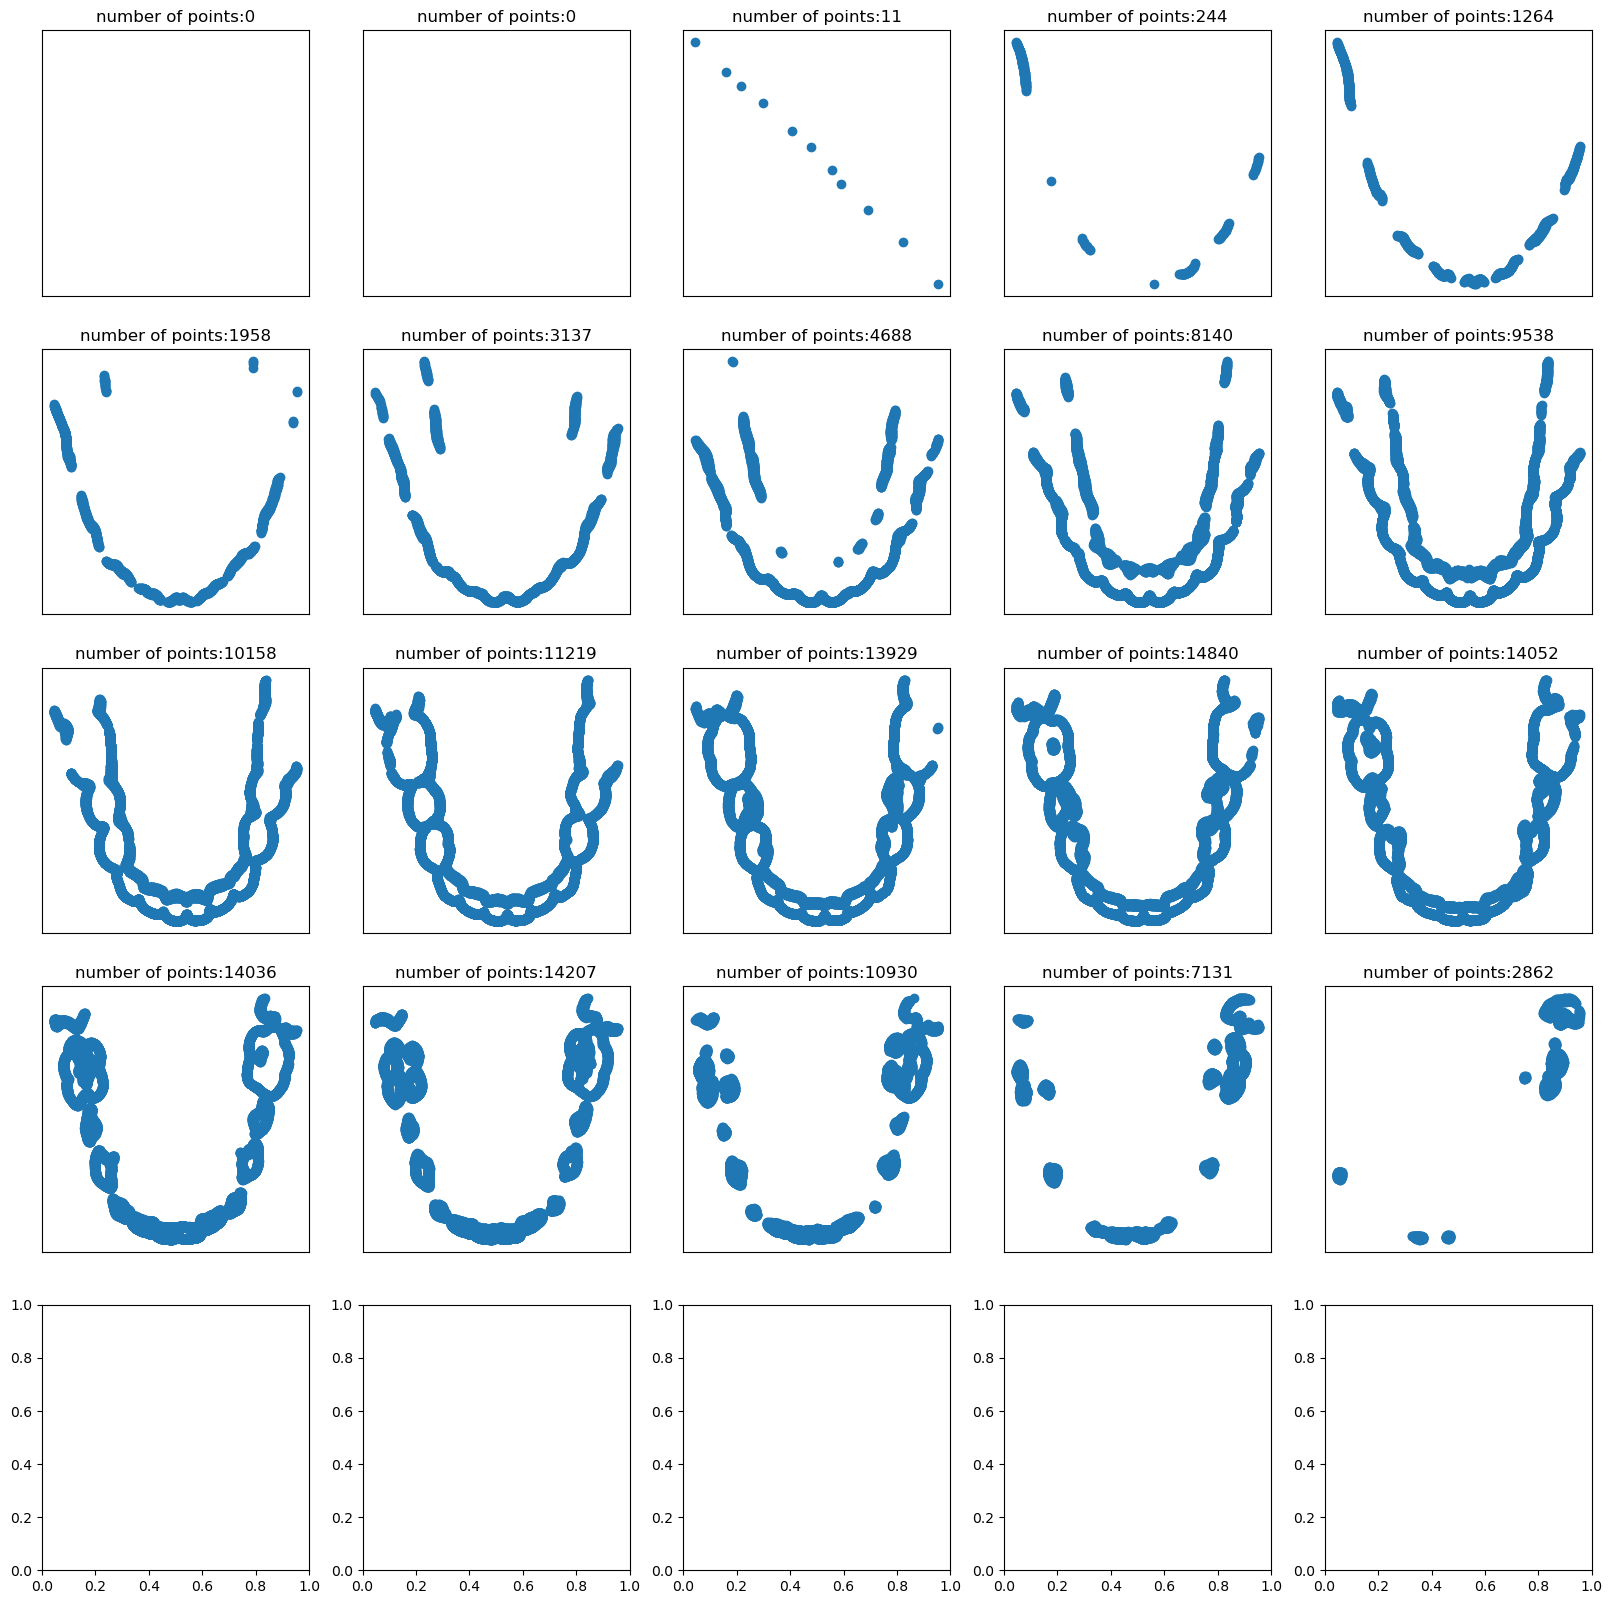

In [8]:
import matplotlib.pyplot as plt
import numpy as np
offset=20
step=0.5

final_stack=[]
for i in range(int(np.ceil(10/step))):
    points=np.array(pcd2.points)
    mask1=points[:,2]<offset+(i+1)*step
    mask2=points[:,2]>offset+i*step
    stack=points[mask1 & mask2]
    final_stack.append(stack)
fig,ax=plt.subplots(int(np.ceil(10/step/5)+1),5,figsize=(20,20))
for j in range(int(np.ceil(10/step/5))):
    for i in range(5):
        try:
            ax[j,i].scatter(final_stack[5*j+i][:,0],final_stack[5*j+i][:,1])
            ax[j,i].set_title(f"number of points:{len(final_stack[5*j+i])}")
            ax[j,i].set_xticks([])
            ax[j,i].set_yticks([])
        except IndexError:
            try:
                ax[i].scatter(final_stack[5*j+i][:,0],final_stack[5*j+i][:,1])
                ax[i].set_title(f"number of points:{len(final_stack[5*j+i])}")
                ax[i].set_xticks([])
                ax[i].set_yticks([])
            except AttributeError:
                break

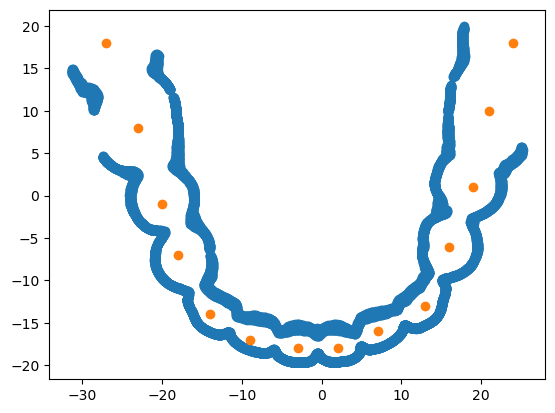

In [9]:
plt.scatter(final_stack[10][:,0],final_stack[10][:,1])
plt.scatter([-27,-23,-20,-18,-14,-9,-3,2,7,13,16,19,21,24],[18,8,-1,-7,-14,-17,-18,-18,-16,-13,-6,1,10,18])
x=[-27,-23,-20,-18,-14,-9,-3,2,7,13,16,19,21,24]
y=[18,8,-1,-7,-14,-17,-18,-18,-16,-13,-6,1,10,18]

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import open3d as o3d
from copy import deepcopy

import matplotlib.pyplot as plt
# Perform K-means clustering
num_clusters = 12  # Number of desired clusters
kmeans = KMeans(n_clusters=num_clusters,init=np.array([x[1:-1],y[1:-1],27*np.ones_like(x)[1:-1]]).T,n_init=1,algorithm="elkan")
labels = kmeans.fit_predict(np.array(pcd_truncated.points))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
pcd2=deepcopy(pcd_truncated)
pcd2.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd2],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852,0.1215])

point cloud has 12 clusters


-31.368060623221844 -19.669638581622625


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11 teeth detected


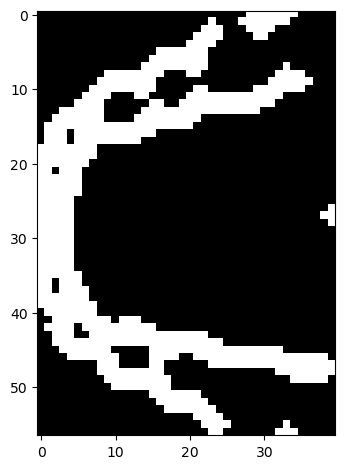

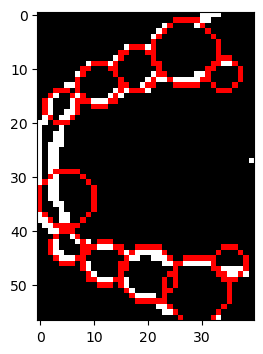

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.morphology import binary_dilation
from skimage.draw import circle_perimeter
from skimage.io import imshow

def detect_teeth_circle(point_cloud,number_teeth=10,num_points=1e4):
    # Load picture and detect edges
    #create an image from list of points
    if len(point_cloud)<num_points:
        return -1,[]
    a=point_cloud[:,0]-np.min(point_cloud[:,0])
    b=point_cloud[:,1]-np.min(point_cloud[:,1])
    x_shape = int(np.max(a))
    y_shape = int(np.max(b))

    image = np.zeros((x_shape+1, y_shape+1))

    indices = np.stack([a-1,b-1], axis =1).astype(int)
    image[indices[:,0], indices[:,1]] = 1
    #edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)
    # Detect two radii
    hough_radii = np.arange(3, 7, 1)
    #hough_res = hough_circle(binary_closing(image), hough_radii)
    f=binary_dilation
    imshow(f(image))
    hough_res = hough_circle(f(image), hough_radii)

    # Select the most prominent 3 circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,min_xdistance=5,min_ydistance=5,
                                            total_num_peaks=number_teeth)
    print(f"{len(radii)} teeth detected")
    # Draw them
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    image_color = color.gray2rgb(image)
    list_center=[]
    for center_y, center_x, radius in zip(cy, cx, radii):
        list_center.append([center_x,center_y])
        circy, circx = circle_perimeter(center_y, center_x, radius,
                                        shape=image.shape)
        image_color[circy, circx] = (255, 0, 0)

    ax.imshow(image_color)
    plt.show()
    return image,list_center
list_centers=[]
print(np.min(final_stack[9][:,0]),np.min(final_stack[9][:,1]))
for stack in final_stack[8:11]:
    edges,center=detect_teeth_circle(stack,number_teeth=11)
    list_centers+=center
list_centers=np.array(sorted(list_centers,key=lambda l:l[0]))

In [12]:

import numpy as np
from sklearn.cluster import KMeans
import open3d as o3d
from copy import deepcopy

import matplotlib.pyplot as plt
# Perform K-means clustering
num_clusters = 15  # Number of desired clusters
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(list_centers)

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
#pcd2=deepcopy(pcd_truncated)
plt.scatter(list_centers[:,0],list_centers[:,1],c=colors)

ValueError: n_samples=11 should be >= n_clusters=15.

In [13]:
z_min=offset+(8+1)*step
z_max=offset+(10+1)*step
z_min,z_max

(24.5, 25.5)

In [14]:
def dist(elem1,elem2):
    res=0
    for i in range(len(elem1)):
        res+=(elem1[i]-elem2[i])**2
    return np.sqrt(res)

def mean_circle(elem1,elem2):
    return [(elem1[0]+elem2[0])/2,(elem1[1]+elem2[1])/2]

In [15]:
def reduce_circles(list_centers,max_dist=10,repeat=0):
        new_circles=[]
        list_centers2=deepcopy(list_centers)
        i=0
        while len(list_centers2)>1:
                first_circle=list_centers2[0]
                n=len(list_centers2)
                for j in range(1,n):
                        second_circle=list_centers2[j]
                        deleted=False
                        if dist(first_circle,second_circle)<max_dist:
                                deleted=True
                                list_centers2=np.delete(list_centers2,j,axis=0)
                                list_centers2=np.delete(list_centers2,0,axis=0)
                                break
                                
                if deleted:
                        new_circles.append(mean_circle(first_circle,second_circle))
                else:
                        list_centers2=np.delete(list_centers2,0,axis=0)
                        new_circles.append(mean_circle(first_circle,first_circle))
        if len(list_centers2)==1:
                new_circles.append(list_centers[0])
        new_circles=np.array(new_circles)
        for i in range(repeat):
                plt.scatter(new_circles[:,0],new_circles[:,1])
                return reduce_circles(new_circles,max_dist=max_dist,repeat=repeat-1)
        return new_circles

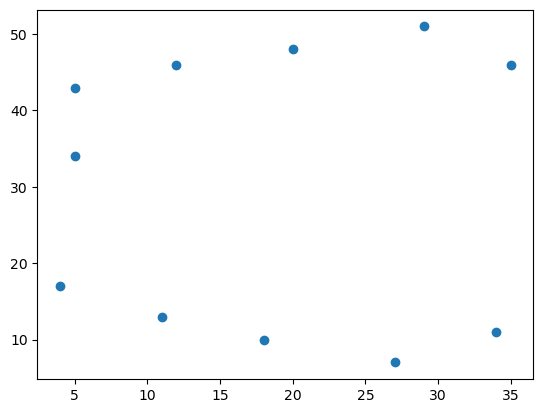

In [16]:
plt.scatter(list_centers[:,0],list_centers[:,1])

7


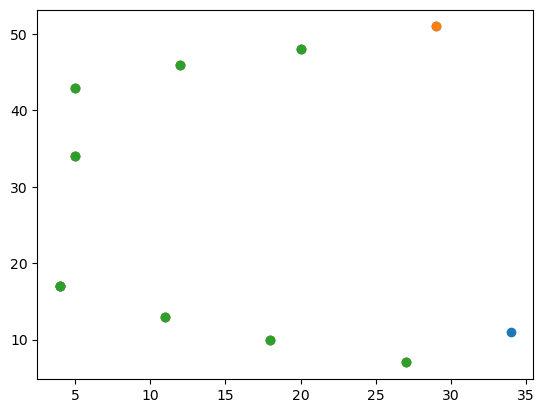

In [17]:
repeat=2
circles=reduce_circles(list_centers,max_dist=7,repeat=repeat)
print(len(circles))
plt.scatter(circles[:,0],circles[:,1])

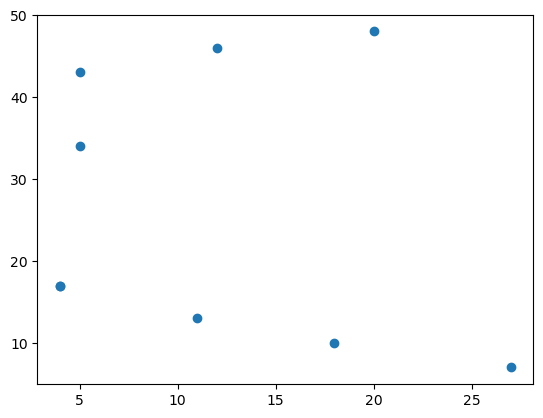

In [18]:
plt.scatter(circles[:,0],circles[:,1])

In [19]:
def remove_outlier(circles,cutoff=0.15):
    new_circles=circles[circles[:,0]<np.mean(circles,axis=0)[0]*(3-cutoff)]
    new_circles=new_circles[new_circles[:,1]<np.mean(circles,axis=0)[1]*(2-cutoff)]
    new_circles=new_circles[new_circles[:,0]>np.mean(circles,axis=0)[0]*cutoff]
    new_circles=new_circles[new_circles[:,1]>np.mean(circles,axis=0)[1]*cutoff]
    return new_circles

7


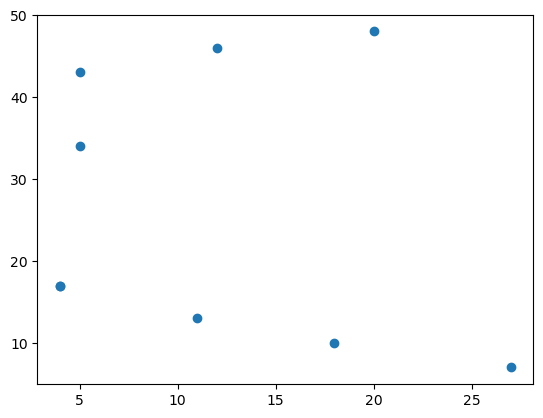

In [20]:
print(len(circles))
plt.scatter(circles[:,0],circles[:,1])

6


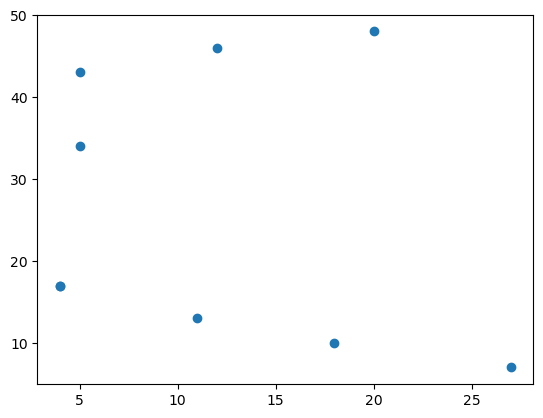

In [21]:
no_circles=remove_outlier(circles,cutoff=0.15)
print(len(no_circles))
plt.scatter(no_circles[:,0],no_circles[:,1])

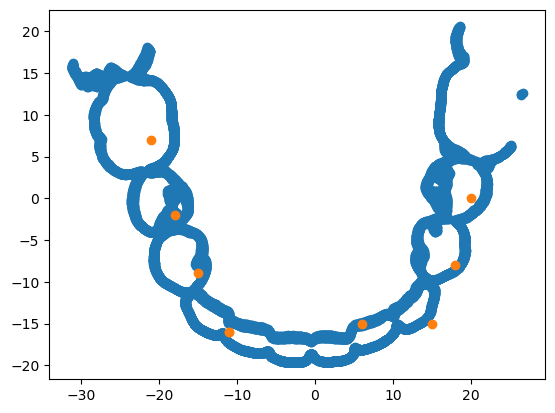

In [22]:
plt.scatter(final_stack[12][:,0],final_stack[12][:,1])
plt.scatter(no_circles[:,1]-28,no_circles[:,0]-20)

In [23]:
from tqdm import tqdm
def get_vertex(triangle):
    vertex1=tuple(abs(triangle[0]-triangle[1]))
    vertex2=tuple(abs(triangle[1]-triangle[2]))
    vertex3= tuple(abs(triangle[2]-triangle[0]))
    return vertex1,vertex2,vertex3

def get_vertex_total(your_mesh):
    vertex=[]
    for i in tqdm(range(len(your_mesh.vectors))):
        vertices=get_vertex(your_mesh.vectors[i])
        for j in vertices:
            if j not in vertex:
                vertex.append(j)
    return vertex

In [24]:
def check_neighbor(triangle,triangle2):
    vertex1=tuple(get_vertex(triangle))
    vertex2=tuple(get_vertex(triangle2))
    inter=set(vertex1).intersection(set(vertex2))
    if inter.__len__()>0:
        return True,inter.pop()
    return False,None

In [25]:
def compute_curvature(id1,id2,mesh):
    normal1=mesh.normals[id1]
    normal2=mesh.normals[id2]
    return np.arccos(round(np.dot(normal1/np.linalg.norm(normal1),normal2/np.linalg.norm(normal2))*1e4)*1e-4)
    

In [26]:
import warnings
warnings.filterwarnings("error")

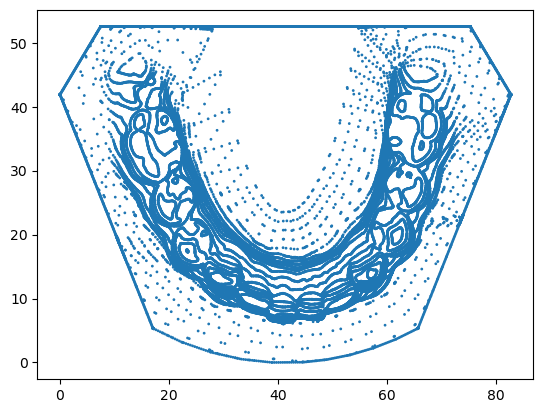

In [49]:
import matplotlib.pyplot as plt
points=np.array(combined.export(file_type='dict')['vertices'])
plt.scatter(points[:,0],points[:,1],s=np.ones(len(points[:,0])))

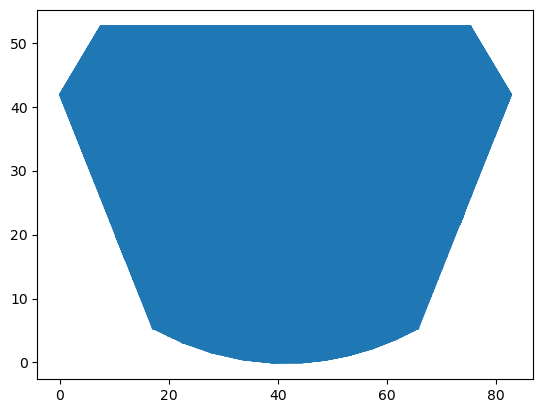

In [45]:
plt.plot(points[:,0],points[:,1],'-',markersize = 0.00000000000000000000001)

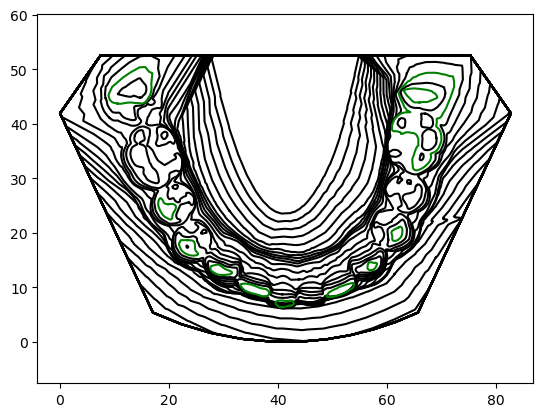

KeyboardInterrupt: 

: 

In [15]:
import trimesh
import numpy as np
from PIL import Image
path=r"C:\Users\Emman\Desktop\JE\Ortho\STL-Segmentation\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"
mesh = trimesh.load_mesh(path)
slice = mesh.section(plane_origin=mesh.centroid,
                     plane_normal=[0,0,1])
slice_2D, to_3D = slice.to_planar()
z_extents = mesh.bounds[:,2]
z_levels  = np.arange(*z_extents, step=1)
sections = mesh.section_multiplane(plane_origin=mesh.bounds[0],
                                   plane_normal=[0,0,1],
                                   heights=z_levels)
combined = np.sum(sections[1:])
combined.show(annotations=True)
trimesh.Scene(mesh).save_image()

In [15]:

import trimesh
from trimesh.curvature import discrete_gaussian_curvature_measure, discrete_mean_curvature_measure, sphere_ball_intersection
import matplotlib.pyplot as plt
import numpy as np
mesh=your_mesh

radii = np.linspace(0.1, 2.0, 10)
gauss = np.array([discrete_gaussian_curvature_measure(mesh, mesh.vertices, r)/sphere_ball_intersection(1, r) for r in radii])
mean = np.array([discrete_mean_curvature_measure(mesh, mesh.vertices, r)/sphere_ball_intersection(1, r) for r in radii])

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(radii, gauss.mean(axis=1))
plt.title('Gaussian Curvature')
plt.show()
plt.figure()
plt.plot(radii, mean.mean(axis=1))
plt.title('Mean Curvature')
plt.show()

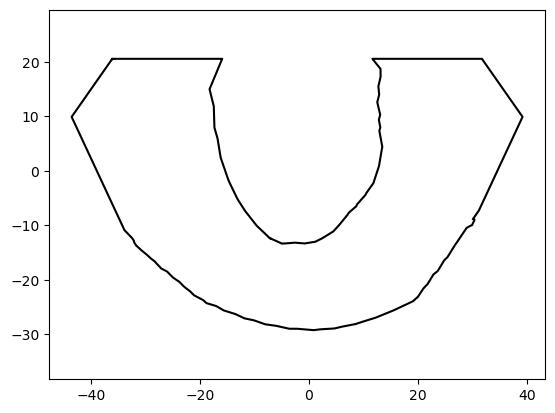

In [7]:
from shapely.geometry import LineString
slice = your_mesh.section(plane_origin=your_mesh.centroid,
                     plane_normal=[0,0,1])
slice_2D, to_3D = slice.to_planar()
slice_2D.show()

In [13]:
import open3d as o3d
import dash_vtk
from stl import mesh
path=r"C:\Users\Emman\Desktop\JE\Ortho\STL-Segmentation\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"
mesh_ = mesh.Mesh.from_file(path)
dash_vtk.View([
    dash_vtk.GeometryRepresentation(trimesh.load_mesh(path))
    ])


View([GeometryRepresentation(<trimesh.Trimesh(vertices.shape=(95003, 3), faces.shape=(189878, 3), name=`43495989_shell_occlusion_l.stl`)>)])

In [28]:
import numpy as np
from stl import mesh
from IPython.display import clear_output
from tqdm import tqdm
from scipy.spatial import KDTree
# Initialize an empty graph
graph = {}
path=r"C:\Users\Emman\Desktop\JE\Ortho\gitFolder\STL-Segmentation\OrthoCAD_Export_43495989\43495989_shell_occlusion_l.stl"
your_mesh = mesh.Mesh.from_file(path)
minmin=np.min(your_mesh.points)
your_mesh.points=your_mesh.points-np.min(your_mesh.points)
your_mesh.update_normals()
points=[]
for vertex in your_mesh.vectors:
    points.append(tuple(vertex[0]))
    points.append(tuple(vertex[1]))
    points.append(tuple(vertex[2]))
tree=KDTree(points)
# Iterate through each triangle in the mesh
for i, triangle in enumerate(tqdm(your_mesh.vectors)):
    for point in triangle:
        dist_,potential_neighbors=tree.query(point,10)
        mask=dist_<1e-2
        dist_=dist_[mask]
        potential_neighbors=potential_neighbors[mask]
        for potential_neighbor in potential_neighbors:
            if potential_neighbor//3!=i:
                triangle2=your_mesh.vectors[potential_neighbor//3]
                is_neighbor,vertex=check_neighbor(triangle,triangle2)
                if is_neighbor:
                    if vertex not in graph.keys():
                        graph[vertex] = []
                        graph[vertex].append(i)
                        graph[vertex].append(potential_neighbor//3)
                        graph[vertex].append(compute_curvature(i,potential_neighbor//3,your_mesh))

100%|██████████| 189878/189878 [03:03<00:00, 1033.95it/s]


In [28]:
len(your_mesh.vectors)

189878

In [29]:
vertices=get_vertex_total(your_mesh)

  0%|          | 707/189878 [00:00<00:26, 7059.84it/s]

100%|██████████| 189878/189878 [1:23:33<00:00, 37.87it/s]


In [30]:
your_mesh.vertices=np.array(vertices)

In [31]:
def compare_tuple(tuple1,tuple2):
    return np.sqrt((tuple1[0]-tuple2[0])**2+(tuple1[1]-tuple2[1])**2+(tuple1[2]-tuple2[2])**2)
#np.min(np.array(pcd2.points)[:,1])

In [32]:
def new_init(markers_init):
    new_markers_init=[]
    new_markers_init2=[]
    for marker in markers_init:
        x,y,z=marker
        min_dist=np.inf
        id_=-1
        for i in range(100):
            dist,id=tree.query([x-minmin,  y-minmin, i-minmin])
            if min_dist>dist:
                min_dist=dist
                id_=id
        new_markers_init.append((id_//3,id_%3))
    for i,j in new_markers_init:
        new_markers_init2.append(your_mesh.vertices[i][j])
    return new_markers_init2

In [33]:
for vertex in your_mesh.vertices:
    if vertex not in graph:
        print(vertex)
        break

TypeError: unhashable type: 'numpy.ndarray'

In [34]:
your_mesh.vertices

array([[3.6401939e-01, 4.5459747e-02, 2.4333954e-01],
       [5.4087067e-01, 1.9141006e-01, 2.3408890e-01],
       [1.7685127e-01, 1.4595032e-01, 9.2506409e-03],
       ...,
       [6.8664551e-05, 1.4155579e-01, 1.9073486e-05],
       [9.3769836e-01, 7.6293945e-05, 3.8146973e-06],
       [9.3769455e-01, 1.4155579e-01, 1.9073486e-05]], dtype=float32)

In [35]:
import numpy as np
def s(test):
    return np.sqrt(1/(len(test)-1)*np.sum((test-np.mean(test))**2))

test=np.array([186, 181, 176, 159, 185, 190, 158, 139, 175, 148])
mu=np.mean(test)
s_=s(test)
mu,s_

(169.7, 17.550245329086174)

In [36]:
from queue import PriorityQueue

# Perform BFS traversal to mark nodes inside tooth radius
def bfs_for_marker(graph, start_node,start_id,visited_node,visited_id, markers,mesh):
    stack = PriorityQueue()
    stack.put((0, start_node,start_id))  # Use priority queue for minimum curvature
    
    while not stack.empty():
        curv, node,id = stack.get()
        visited_node.add(node)
        visited_id.add(id)   
        print(curv,node,id)
        # Check if this node should be marked
        if should_mark_node(node, markers):
            markers.add(node)
        
        # Add adjacent nodes to the stack with their curvature
        for id,neighbor in get_adjacent_nodes(graph, visited_id,node,mesh):  # Implement this function
            if neighbor not in visited_node:
                neighbor_curv = graph[node][-1]
                stack.put((neighbor_curv, neighbor,id))


# Check if a node should be marked based on markers
def should_mark_node(node, markers):
    return node not in markers

# Function to get adjacent nodes for a given node index
def get_adjacent_nodes(graph, visited_id,node,mesh):
    neighbors=[]
    id_=[]
    neighbors_id = graph[node][:-1]
    for id in neighbors_id:
        if id not in visited_id:
            vertex=get_vertex(mesh.vectors[id])
            neighbors.append([id,vertex[0]])
            neighbors.append([id,vertex[1]])
            neighbors.append([id,vertex[2]])
    return neighbors

# Function to get the front lower node (assuming it's the first node)
def get_front_lower_node(graph):
    return list(graph.keys())[0]

# Function to get the back lower node (assuming it's the second node)
def get_back_lower_node(graph):
    return list(graph.keys())[1]

# Function to get the origin of a specific tooth (replace 'tooth_id' with the desired tooth ID)
def get_tooth_origin(graph, tooth_id):
    for point, neighbors in graph.items():
        if tooth_id in neighbors:
            return point
    return None  # Tooth ID not found in the graph

# Initialize markers for teeth and lower parts using a list of 3D points
def initialize_markers(graph, num_teeth, markers_init,mesh):
    # Initialize markers with the provided list of 3D points
    markers = set(markers_init)
    
    # Start BFS traversal from one of the markers
    start_node = markers_init[0]
    start_id=0
    bfs_for_marker(graph, start_node, start_id,set(), set(),markers,mesh)
    return markers

# Example usage
num_teeth = 15  # Replace with the actual number of teeth
graph = graph
x=[-27,-23,-20,-18,-14,-9,-3,2,7,13,16,19,21,24]
y=[18,8,-1,-7,-14,-17,-18,-18,-16,-13,-6,1,10,18]
markers_init=np.array([x,y,np.median(np.array(points)[:,2])*np.ones_like(x)]).T
actual_markers=new_init(markers_init)
markers = initialize_markers(graph, num_teeth, actual_markers,your_mesh)
print("Markers:", markers)



0 0.010269165 0


KeyError: 0.010269165

In [ ]:
new_init(markers_init)

[(0.021282196, 0.13830566, 0.1043396),
 (0.0058689117, 0.21370697, 0.045692444),
 (0.12296677, 0.058921814, 0.15441132),
 (0.09652138, 0.03362274, 0.07649231),
 (0.058475494, 0.046051025, 0.10909271),
 (0.12890625, 0.004337311, 0.08680725),
 (0.09857178, 0.0949707, 0.03265381),
 (0.027011871, 0.08924484, 0.041908264),
 (0.107055664, 0.040992737, 0.0893631),
 (0.18151093, 0.09718323, 0.105918884),
 (0.0044517517, 0.13046265, 0.11578369),
 (0.07785034, 0.05132675, 0.03741455),
 (0.21559525, 0.03703308, 0.048683167),
 (0.006286621, 0.16315079, 0.075050354)]